# Train a Neural Network using the LeakyRelu

This is a notebook for the medium article [Train a Neural Network using the LeakyRelu](https://bindichen.medium.com)

Please check out article for instructions

**License**: [BSD 2-Clause](https://opensource.org/licenses/BSD-2-Clause)

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## Helper function to plot metric

In [19]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

## Leaky ReLU

In [4]:
z = np.linspace(-5,5,200)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha * z, z)

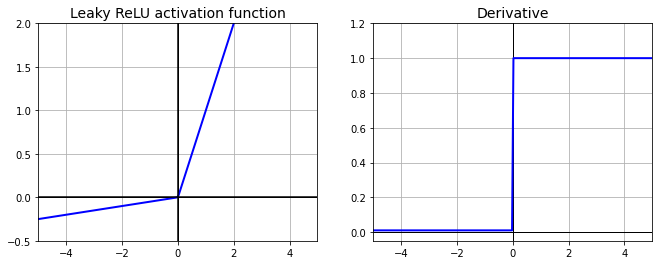

In [9]:
plt.figure(figsize=(11,4))

plt.subplot(1, 2, 1)
# coordinate 
plt.plot([-7, 7], [0, 0], 'k-', linewidth=1)
plt.plot([0, 0], [-2.2, 5], 'k-', linewidth=1)
# Plot
plt.plot(z, leaky_relu(z, 0.05), 'b-', linewidth=2)
plt.plot([-5,5], [0,0], 'k-')
plt.plot([0,0], [-0.5, 5], 'k-')
plt.grid(True)
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5,5,-0.5, 2])

plt.subplot(1, 2, 2)
# coordinate 
plt.plot([-7, 7], [0, 0], 'k-', linewidth=1)
plt.plot([0, 0], [-2.2, 5], 'k-', linewidth=1)
# Plot
plt.plot(z, derivative(leaky_relu, z), "b-", linewidth=2, label="Leaky ReLU")
plt.grid(True)
plt.title("Derivative", fontsize=14)
plt.axis([-5,5,-0.05, 1.2])

plt.show()

## Fashion MNIST dataset

In [10]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [11]:
X_train_full.shape

(60000, 28, 28)

In [12]:
X_train_full.dtype

dtype('float64')

In [13]:
X_test.shape

(10000, 28, 28)

In [14]:
y_test.dtype

dtype('uint8')

## take a look Keras built-in

In [14]:
[m for m in dir(keras.activations) if not m.startswith('_')]

['deserialize',
 'elu',
 'exponential',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'tanh']

In [11]:
## https://keras.io/api/layers/activation_layers/
## https://keras.io/api/layers/activation_layers/leaky_relu/
[m for m in dir(keras.layers) if 'relu' in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

## 1. Train a deep NN with Leaky ReLU

In [15]:
from tensorflow.keras.layers import Dense, Flatten, LeakyReLU

tf.random.set_seed(42)
np.random.seed(42)

def create_model(): 
    # By default, Keras uses Glorot initialization with a uniform distribution.
    model = keras.models.Sequential()
    model.add(Flatten(input_shape=[28, 28]))
    model.add(Dense(300))
    model.add(LeakyReLU()),
    for layer in range(49):
        model.add(Dense(100))
        model.add(LeakyReLU()),
    model.add(Dense(10, activation="softmax"))
    
    model.compile(
        optimizer='sgd', 
        loss='sparse_categorical_crossentropy', 
        metrics=['accuracy']
    )
    return model

In [16]:
model = create_model()

In [17]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=10,
    validation_data=(X_valid, y_valid),
)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 38s 700us/sample - loss: 2.3027 - accuracy: 0.0991 - val_loss: 2.3028 - val_accuracy: 0.0914
Epoch 2/10
55000/55000 [==============================] - 38s 695us/sample - loss: 2.3027 - accuracy: 0.0979 - val_loss: 2.3030 - val_accuracy: 0.0914
Epoch 3/10
55000/55000 [==============================] - 36s 655us/sample - loss: 2.3027 - accuracy: 0.0999 - val_loss: 2.3028 - val_accuracy: 0.1008
Epoch 4/10
55000/55000 [==============================] - 36s 648us/sample - loss: 2.3027 - accuracy: 0.0996 - val_loss: 2.3031 - val_accuracy: 0.0914
Epoch 5/10
55000/55000 [==============================] - 36s 648us/sample - loss: 2.3027 - accuracy: 0.0984 - val_loss: 2.3028 - val_accuracy: 0.0914
Epoch 6/10
55000/55000 [==============================] - 36s 650us/sample - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2.3029 - val_accuracy: 0.0980
Epoch 7/10
55000/55000 [=====================

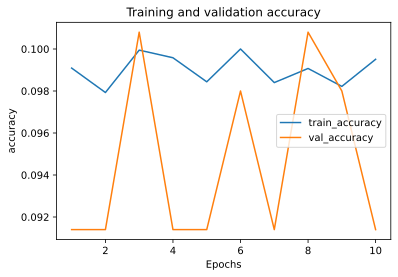

In [20]:
plot_metric(history, 'accuracy')

## 2. Train with He initialization and a smaller learning rate

In [24]:
from tensorflow.keras.layers import Dense, Flatten, LeakyReLU

tf.random.set_seed(42)
np.random.seed(42)

def create_model(): 
    # By default, Keras uses Glorot initialization with a uniform distribution.
    model = keras.models.Sequential()
    model.add(Flatten(input_shape=[28, 28]))
    model.add(Dense(300, kernel_initializer="he_normal"))
    model.add(LeakyReLU()),
    for layer in range(49):
        model.add(Dense(100, kernel_initializer="he_normal"))
        model.add(LeakyReLU()),
    model.add(Dense(10, activation="softmax"))
    
    model.compile(
        optimizer=keras.optimizers.SGD(lr=1e-3), 
        loss='sparse_categorical_crossentropy', 
        metrics=['accuracy']
    )
    return model

In [26]:
model_leaky_relu_he = create_model()

In [27]:
history_leaky_relu_he = model_leaky_relu_he.fit(
    X_train, 
    y_train, 
    epochs=10,
    validation_data=(X_valid, y_valid),
)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 39s 701us/sample - loss: 0.9058 - accuracy: 0.6601 - val_loss: 0.6272 - val_accuracy: 0.7688
Epoch 2/10
55000/55000 [==============================] - 35s 641us/sample - loss: 0.5844 - accuracy: 0.7879 - val_loss: 0.5320 - val_accuracy: 0.8058
Epoch 3/10
55000/55000 [==============================] - 34s 626us/sample - loss: 0.5120 - accuracy: 0.8168 - val_loss: 0.4637 - val_accuracy: 0.8332
Epoch 4/10
55000/55000 [==============================] - 34s 613us/sample - loss: 0.4703 - accuracy: 0.8302 - val_loss: 0.4305 - val_accuracy: 0.8448
Epoch 5/10
55000/55000 [==============================] - 34s 616us/sample - loss: 0.4403 - accuracy: 0.8416 - val_loss: 0.4646 - val_accuracy: 0.8336
Epoch 6/10
55000/55000 [==============================] - 34s 626us/sample - loss: 0.4180 - accuracy: 0.8479 - val_loss: 0.4061 - val_accuracy: 0.8568
Epoch 7/10
55000/55000 [=====================

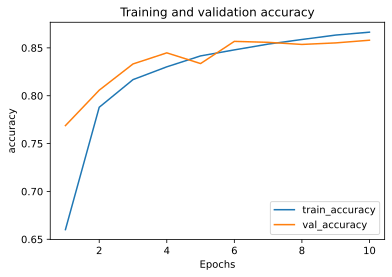

In [29]:
plot_metric(history_leaky_relu_he, 'accuracy')

## 3. Comparing to ReLU

In [31]:
from tensorflow.keras.layers import Dense, Flatten

tf.random.set_seed(42)
np.random.seed(42)

def create_model(): 
    # By default, Keras uses Glorot initialization with a uniform distribution.
    model = keras.models.Sequential()
    model.add(Flatten(input_shape=[28, 28]))
    model.add(Dense(300, activation="relu", kernel_initializer="he_normal"))
    for layer in range(49):
        model.add(Dense(100, activation="relu", kernel_initializer="he_normal"))
    model.add(Dense(10, activation="softmax"))
    
    model.compile(
        optimizer=keras.optimizers.SGD(lr=1e-3), 
        loss='sparse_categorical_crossentropy', 
        metrics=['accuracy']
    )
    return model

In [32]:
model_relu_he = create_model()

In [34]:
history_relu_he = model_relu_he.fit(
    X_train, 
    y_train, 
    epochs=10,
    validation_data=(X_valid, y_valid),
)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 32s 584us/sample - loss: 1.3612 - accuracy: 0.4812 - val_loss: 0.8774 - val_accuracy: 0.6694
Epoch 2/10
55000/55000 [==============================] - 34s 627us/sample - loss: 0.7161 - accuracy: 0.7270 - val_loss: 0.6390 - val_accuracy: 0.7614
Epoch 3/10
55000/55000 [==============================] - 34s 614us/sample - loss: 0.6110 - accuracy: 0.7739 - val_loss: 0.7564 - val_accuracy: 0.7382
Epoch 4/10
55000/55000 [==============================] - 32s 589us/sample - loss: 0.5487 - accuracy: 0.7980 - val_loss: 0.4873 - val_accuracy: 0.8236
Epoch 5/10
55000/55000 [==============================] - 33s 594us/sample - loss: 0.5057 - accuracy: 0.8160 - val_loss: 0.4889 - val_accuracy: 0.8230
Epoch 6/10
55000/55000 [==============================] - 33s 606us/sample - loss: 0.4749 - accuracy: 0.8300 - val_loss: 0.4850 - val_accuracy: 0.8250
Epoch 7/10
55000/55000 [=====================

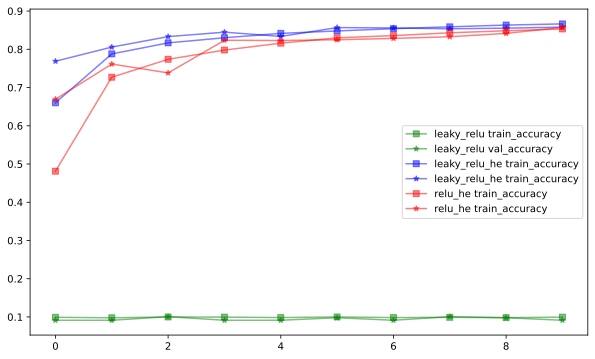

In [35]:
plt.figure(figsize=(10,6))

plt.plot(history.history['accuracy'], 'gs-', label='leaky_relu train_accuracy', alpha=0.5)
plt.plot(history.history['val_accuracy'], 'g*-', label='leaky_relu val_accuracy', alpha=0.5)

plt.plot(history_leaky_relu_he.history['accuracy'], 'bs-', label='leaky_relu_he train_accuracy', alpha=0.5)
plt.plot(history_leaky_relu_he.history['val_accuracy'], 'b*-', label='leaky_relu_he train_accuracy', alpha=0.5)

plt.plot(history_relu_he.history['accuracy'], 'rs-', label='relu_he train_accuracy', alpha=0.5)
plt.plot(history_relu_he.history['val_accuracy'], 'r*-', label='relu_he train_accuracy', alpha=0.5)

plt.legend()
plt.show()